In [22]:
import numpy as np

# Trace of a Matrix

In [23]:
def compute_trace(mat):
    end = min(mat.shape)
    trace = 0
    for i in range(end):
        trace += mat[i][i]
    return trace

mat = np.diag([1, 2, 3, 4, 5])
compute_trace(mat)

15

# Gram-Schmidt Procedures

In [24]:
def gram_schmidt(mat): # this algorithm is not very stable (numerically) --> sensitive to floating points errors
    res = list()
    for vet in mat.T:
        temp = vet
        for r in res:
            temp -= r * ((r @ vet)/(r @ r)) # incremental algorithm

        if np.array_equal(temp, np.zeros(temp.shape)):
            raise np.linalg.LinAlgError("Column vectors are not linear independent")

        temp /= np.linalg.norm(temp)
        res.append(temp) # you could override the starting matrix (mat)
    res = np.array(res)
    return res.T

mat = np.random.random((5, 5))
mat_ort = gram_schmidt(mat)
prods = list()

for i, v1 in enumerate(mat_ort.T):
    for j, v2 in enumerate(mat_ort.T):
        if i == j:
            continue
        prods.append(v1 @ v2)

print(np.linalg.norm(mat[:, 1])) # the norm is 1 --> exactly as expected
prods, mat_ort,np.linalg.norm(prods) # as you can see, the procedures works perfectly

1.0


([3.9898639947466563e-17,
  1.3877787807814457e-17,
  2.3592239273284576e-16,
  -1.817990202823694e-15,
  3.9898639947466563e-17,
  3.608224830031759e-16,
  -2.5673907444456745e-16,
  1.5404344466674047e-15,
  1.3877787807814457e-17,
  3.608224830031759e-16,
  -1.6653345369377348e-16,
  -2.498001805406602e-16,
  2.3592239273284576e-16,
  -2.5673907444456745e-16,
  -1.6653345369377348e-16,
  1.942890293094024e-16,
  -1.817990202823694e-15,
  1.5404344466674047e-15,
  -2.498001805406602e-16,
  1.942890293094024e-16],
 array([[ 0.64738237, -0.10951327,  0.13702563, -0.07677307, -0.73772134],
        [ 0.60410641,  0.21018952, -0.57345789, -0.28900733,  0.4224886 ],
        [ 0.03152944,  0.94140181,  0.15775932,  0.27473163, -0.11136903],
        [ 0.44163985, -0.22273202,  0.34436441,  0.68243806,  0.41356516],
        [ 0.14110863,  0.08933251,  0.71336889, -0.60776762,  0.30631912]]),
 3.4812239505076023e-15)

([3.9898639947466563e-17,
  1.3877787807814457e-17,
  2.3592239273284576e-16,
  -1.817990202823694e-15,
  3.9898639947466563e-17,
  3.608224830031759e-16,
  -2.5673907444456745e-16,
  1.5404344466674047e-15,
  1.3877787807814457e-17,
  3.608224830031759e-16,
  -1.6653345369377348e-16,
  -2.498001805406602e-16,
  2.3592239273284576e-16,
  -2.5673907444456745e-16,
  -1.6653345369377348e-16,
  1.942890293094024e-16,
  -1.817990202823694e-15,
  1.5404344466674047e-15,
  -2.498001805406602e-16,
  1.942890293094024e-16],
 array([[ 0.64738237, -0.10951327,  0.13702563, -0.07677307, -0.73772134],
        [ 0.60410641,  0.21018952, -0.57345789, -0.28900733,  0.4224886 ],
        [ 0.03152944,  0.94140181,  0.15775932,  0.27473163, -0.11136903],
        [ 0.44163985, -0.22273202,  0.34436441,  0.68243806,  0.41356516],
        [ 0.14110863,  0.08933251,  0.71336889, -0.60776762,  0.30631912]]),
 3.4812239505076023e-15)

# Newton Method

The zero of the function is in X = 0.7390852043758361 and Y = 1.1909536434817625e-07
6


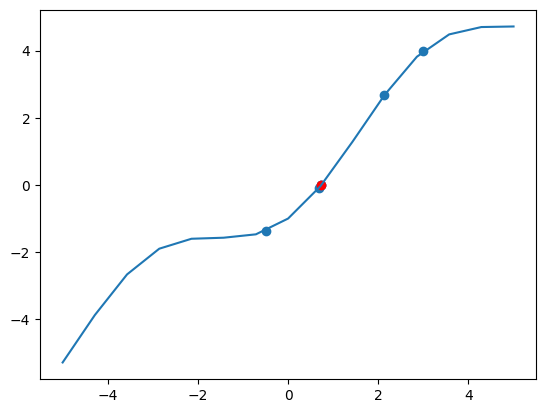

In [ ]:
from matplotlib import pyplot as plt

x0 = 3
f = lambda x : x - np.cos(x)
df = lambda x : 1 + np.sin(x)
tol = 10**-6
maxiter = 50

def newton_method(f, df, x0, tol, maxiter): # very sensitive to the initial guess --> keep in mind
    iters_value = list()
    iters_value.append(x0)
    for _ in range(maxiter): # convergence in quadratic
        x0 -= f(x0) / df(x0) if df(x0) != 0 else 1 # you can plot the behaviour of x0 with matplotlib
        iters_value.append(x0)
        if np.abs(f(x0)) <= tol:
            break
    print(f"The zero of the function is in X = {x0} and Y = {f(x0)}")
    return iters_value

iter_values = newton_method(f, df, x0, tol, maxiter)

x = np.linspace(-5, 5, 15)

plt.plot([i for i in x], [f(i) for i in x])
plt.scatter([i for i in iter_values], [f(i) for i in iter_values])
plt.scatter(iter_values[-1], f(iter_values[-1]), color="r")
print(len(iter_values))

# Gershgorin Circles --> Spectral Radius for each eigenvalue

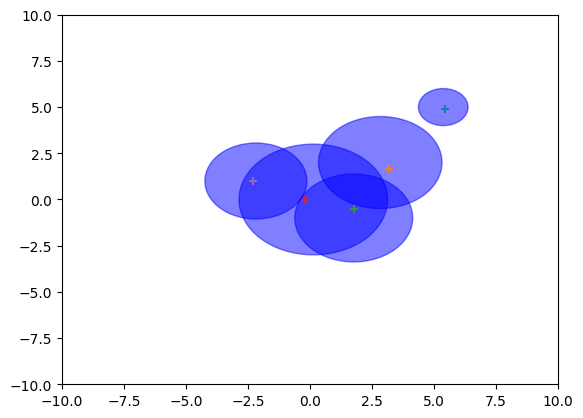

In [36]:
def gershgorin_circles(mat): # works the same with complex numbers --> same exact function in the gauss plane (Re, Im)
    r = np.zeros((len(mat), ))
    for i, vec in enumerate(mat):
        r[i] += sum(np.abs(vec)) - np.abs(mat[i][i])
    fig, ax = plt.subplots()
    ax.set_xlim((-10, 10))
    ax.set_ylim((-10, 10))
    for i in range(len(mat)):
        ax.add_patch(plt.Circle((mat[i][i].real, mat[i][i].imag), r[i], color="b", alpha=0.5))
    eigvals = np.linalg.eigvals(mat)
    for val in eigvals:
        plt.scatter(val.real, val.imag, marker="+") # extracting real and imaginary part from dtype=float of numpy

np.random.seed(55555)

N = 5
D = np.diag([0, 2 + 2j, 1 - 1j, 5 + 5j, -3 + 1j])
M = np.random.rand(N, N) + D

gershgorin_circles(M)

# Euler Method for ODE (Ordinary Differential Equation)

In [ ]:
dy = lambda x, y : np.exp(-x) # ODE of the form: y' = f(x, y)
x0 = 0
y0 = -1
T = 1
h = 0.01

def euler_method(dy, x0, y0, T, h):
    x = x0
    y = y0

    while x < T:
        y += h * dy(x, y)
        x += h

    return y

print(f"The value of Y in X = {T} is {euler_method(dy, x0, y0, T, h)}, the real value is {-1 / np.exp(1)}")
# you can plot the value of the approximation --> you can see how the incremental linear function imitate the exponential

The value of Y in X = 1 is -0.3647135707147556, the real value is -0.36787944117144233


# Mises Method for Dominant Eigenvalues

In [30]:
def mises(mat, maxiter, tol):
    vec = np.ones(len(mat))
    vec /= np.linalg.norm(vec)
    prev = vec

    for _ in range(maxiter):
        vec = mat @ vec
        vec /= np.linalg.norm(vec)
        if np.linalg.norm(vec - prev) <= tol:
            break
        prev = vec

    return np.linalg.norm(mat @ vec) / np.linalg.norm(vec), vec

mat = np.array([
    np.array([1, 0, 5]),
    np.array([0, 2, 2]),
    np.array([0, 0, 3])
])
maxiter = 100
tol = 10**-6

eigval, eigvec = mises(mat, maxiter, tol)
print(f"The dominant eigenvalue is: {eigval}, and the corresponding eigenvector is: {eigvec}")
# the dominant eigenvalue should be 3

The dominant eigenvalue is: 3.000001390691036, and the corresponding eigenvector is: [0.74535703 0.59628329 0.29814281]


# Schulz Method for Inverting a Matrix

In [31]:
def schulz(mat, maxiter, tol):
    x0 = mat.T / (np.linalg.norm(mat) ** 2)
    for i in range(maxiter):
        x0 = x0 @ (2 * np.eye(len(mat)) - mat @ x0)
        if np.linalg.norm(mat @ x0 - np.eye(len(mat))) <= tol:
            break
    return x0

mat = np.array([
    np.array([1, 0, 0]),
    np.array([0, 2, 0]),
    np.array([0, 0, 3])
])
maxiter = 100
tol = 10**-6

print(f"The inverse of the matrix is the following:\n{schulz(mat, maxiter, tol)}")

The inverse of the matrix is the following:
[[0.99999999 0.         0.        ]
 [0.         0.5        0.        ]
 [0.         0.         0.33333333]]


# Conjugate Gradient Algorithm

Implement the conjugate gradient algorithm for solving the linear system $A{\bf x}={\bf b}$. The method is described as follows:


1.   initialize ${\bf x}^{(0)}$.
2.   compute ${\bf r}^{(0)} = {\bf b}-A {\bf x}^{(0)}$
3.   assign ${\bf p}^{(0)}={\bf r}^{(0)}$
4.   for $k=0,1,2,...$ :
    *   calculate $\alpha^{(k)}=\frac{({\bf r}^{(k)})^T{\bf r}^{(k)}}{({\bf p}^{(k)})^TA{\bf p}^{(k)}}$
    *   update ${\bf x}^{(k+1)}={\bf x}^{(k)}+\alpha^{(k)}{\bf p}^{(k)}$
    *   calculate ${\bf r}^{(k+1)} = {\bf b}-A {\bf x}^{(k+1)}= {\bf r}^{(k)}-\alpha^{(k)}A{\bf p}^{(k)}$
    *   if $||{\bf r}^{(k+1)}||<\epsilon$ then
        * STOP
    * else
        *   calculate $\beta^{(k)}=\frac{({\bf r}^{(k+1)})^T{\bf r}^{(k+1)}}{({\bf r}^{(k)})^T{\bf r}^{(k)}}$
        *   update ${\bf p}^{(k+1)}={\bf r}^{(k+1)}+\beta^{(k)}{\bf p}^{(k)}$

In [32]:
def CG(A, b, x0, tol=1e-5):
    xk = x0
    rk = b - np.dot(A, xk)
    pk = rk
    rk_norm = np.linalg.norm(rk)

    num_iter = 0
    vec_x = [xk]
    while rk_norm > tol:
        apk = np.dot(A, pk)
        rkrk = np.dot(rk, rk)

        alpha = rkrk / np.dot(pk, apk)
        xk = xk + alpha * pk
        rk = rk - alpha * apk
        beta = np.dot(rk, rk) / rkrk
        pk = rk + beta * pk

        num_iter += 1
        vec_x.append(xk)
        rk_norm = np.linalg.norm(rk)
        print('Iteration: {} \t x = {} \t residual = {:.4f}'.
              format(num_iter, xk, rk_norm))

    print('\nSolution: \t x = {}'.format(xk))

    return np.array(vec_x)

from sklearn.datasets import make_spd_matrix
np.random.seed(55555)
A = make_spd_matrix(15, random_state=0)
x_star = np.random.random(15)
b = np.dot(A, x_star)

print('A\n', A, '\n')
print('b\n', b, '\n')
print('The solution x* should be\n', x_star)
print('\n')

x0 = np.random.random(15)
xs = CG(A, b, x0)

A
 [[ 0.69578045  0.41344559 -0.21235359  0.08731187  0.49853311 -0.09208687
   0.17129289 -0.31994505  0.39447036 -0.86171352 -0.55676226  0.56753303
   0.40995753  1.07233133  0.15794367]
 [ 0.41344559  1.12404142 -0.36657062  0.1314566   0.85536775 -0.14595902
   0.23311769 -0.74315693  0.76677341 -1.65822314 -0.83363275  0.8422513
   0.60168263  1.70311225  0.5122316 ]
 [-0.21235359 -0.36657062  0.68181819 -0.05985675 -0.43229037  0.20961475
  -0.06438156  0.54877713 -0.32740845  1.06359337  0.53847348 -0.51730975
  -0.41775478 -0.96137125 -0.21987417]
 [ 0.08731187  0.1314566  -0.05985675  0.41820162  0.26529099 -0.07233684
   0.14781176 -0.10828194  0.18884729 -0.31506645 -0.17541599  0.22657734
   0.14617311  0.47720655  0.1057475 ]
 [ 0.49853311  0.85536775 -0.43229037  0.26529099  1.75298795 -0.16163556
   0.28254564 -0.77741056  0.81746651 -2.33705235 -1.08194154  0.98454232
   0.83836211  2.21414498  0.37411617]
 [-0.09208687 -0.14595902  0.20961475 -0.07233684 -0.16163556  